In [14]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [3]:
data = pd.read_csv("student-mat.csv", sep=";")
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [26]:
# G1, G2 are first and second period grades. G3 is final year grades
# we will try to predict G3 using important atrributes
# our attributes will be G1, G2, studytime, failures, absencses

data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data = shuffle(data)
print(data.head())

     G1  G2  G3  studytime  failures  absences
82    7   6   6          2         0        10
29   10  12  11          2         0        16
22   15  15  16          2         0         2
128   7   4   0          1         2         0
107  16  18  18          3         0         2


In [27]:
predict = "G3"

# Features: all but G3
X = np.array(data.drop([predict], 1)) 

# Labels: G3
y = np.array(data[predict])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 82 to 100
Data columns (total 6 columns):
G1           395 non-null int64
G2           395 non-null int64
G3           395 non-null int64
studytime    395 non-null int64
failures     395 non-null int64
absences     395 non-null int64
dtypes: int64(6)
memory usage: 21.6 KB


In [29]:
# split data into train and test use 10% test size since data is small
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [37]:
# try running model several times and save best parameter output
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        
        # save the best model using pickle
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print()
print(best)

Accuracy: 0.7264706411348542
Accuracy: 0.7415667540849118
Accuracy: 0.6843371023578805
Accuracy: 0.7765521797619189
Accuracy: 0.7116791602581078
Accuracy: 0.8231668525915288
Accuracy: 0.8158177741327465
Accuracy: 0.7206297270887876
Accuracy: 0.7162622109596775
Accuracy: 0.7633079945243091
Accuracy: 0.754828420437348
Accuracy: 0.8523532060437101
Accuracy: 0.7750192781867077
Accuracy: 0.9124999298571608
Accuracy: 0.7269253840150822
Accuracy: 0.7292866692362576
Accuracy: 0.9497816939228708
Accuracy: 0.7923779228942723
Accuracy: 0.8662264668159961
Accuracy: 0.7769194603325879

0.9497816939228708


In [38]:
# load the best model we saved
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

# print the results for best coefficients and intercept
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

# show student, predicted final grade and actual final grade
predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])

-------------------------
Coefficient: 
 [ 0.14692145  0.98758587 -0.17616318 -0.26410656  0.03762277]
Intercept: 
 -1.5429797771078775
-------------------------
5.870081940771198 [7 7 3 0 0] 8
13.011414003897828 [14 13  3  1 12] 13
9.378091180758597 [ 9 10  2  0  2] 9
11.307259121891947 [ 8 12  1  0  0] 12
12.781613147946286 [12 13  2  0  2] 13
13.380007839670482 [13 13  2  0 14] 14
18.496583934656115 [19 18  3  0  0] 19
7.0338309952677776 [7 8 2 0 0] 0
8.56873300239579 [ 7 10  3  1  0] 10
5.8444098425385125 [7 7 4 0 4] 6
4.228703719804283 [ 5  5  2  0 12] 5
10.587844043853515 [10 11  2  0  4] 9
9.185660524616676 [10 10  2  1  0] 0
-0.954799387001205 [7 0 1 1 0] 0
8.717159566921532 [9 9 1 0 6] 10
12.928534595476338 [13 13  2  0  2] 13
9.571016436886989 [11 10  3  0  4] 11
9.571016436886989 [11 10  3  0  4] 10
16.197085787250803 [15 16  3  0  7] 15
10.46125430668912 [10 11  4  0 10] 11
12.651453776913895 [13 13  4  0  4] 12
15.197549240268131 [15 15  2  0  2] 16
9.012572378867468 [ 6 1

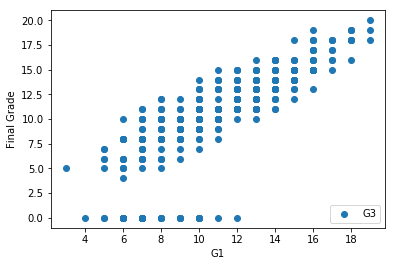

In [40]:
# Drawing and plotting model
plot = "G1"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

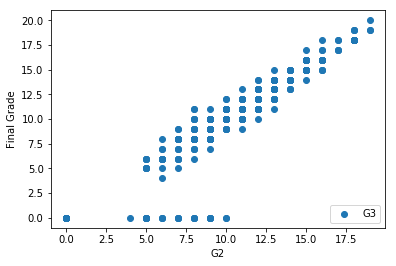

In [41]:
plot = "G2"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

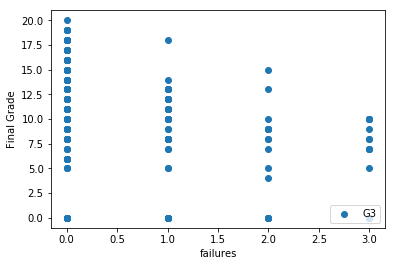

In [43]:
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

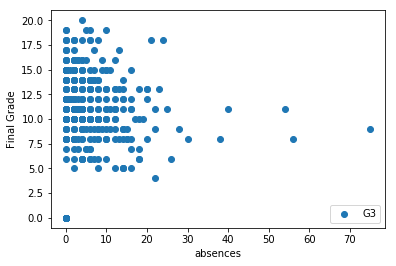

In [45]:
plot = "absences"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

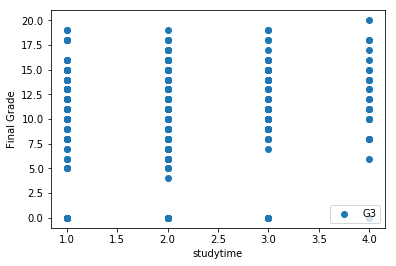

In [46]:
plot = "studytime"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()